<a target="_blank" href="https://colab.research.google.com/github/BrunoCapron/EQE358-metodos_numericos/blob/main/Capitulo_7_Res_EDOs/Res_EDOs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Métodos de Euler

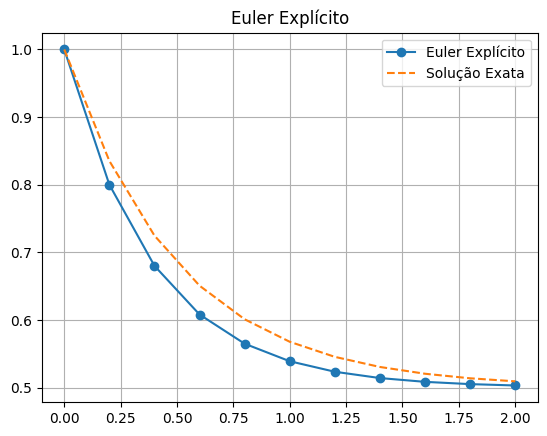

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler Explícito
def euler_explicito(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        u.append(u[-1] + h * f(t[-1], u[-1]))
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1 (solução exata: u(t) = 0.5 + 0.5*e^{-2t})
def f(t, u): return -2*u + 1

t, u = euler_explicito(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Euler Explícito')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.legend(); plt.grid(); plt.title('Euler Explícito'); plt.show()


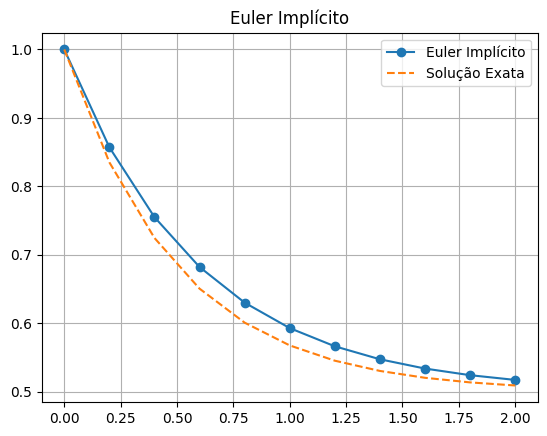

In [2]:
# Método de Euler Implícito (para equações lineares do tipo du/dt = -λu + c)
def euler_implicito_linear(lambda_, c, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        u_next = (u[-1] + h*c) / (1 + h*lambda_)
        u.append(u_next)
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1
t, u = euler_implicito_linear(lambda_=2, c=1, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Euler Implícito')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.legend(); plt.grid(); plt.title('Euler Implícito'); plt.show()


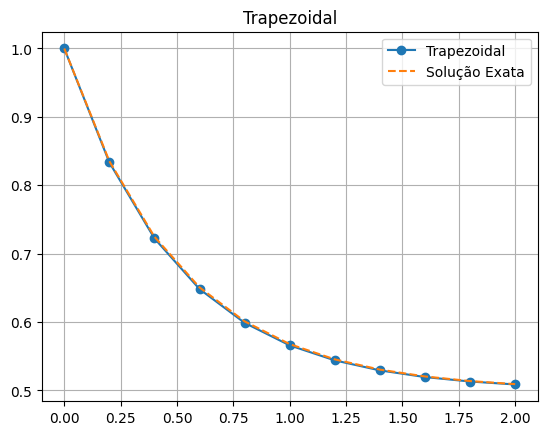

In [3]:
# Método Trapezoidal (para EDOs lineares du/dt = -λu + c)
def trapezoidal_linear(lambda_, c, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        num = (1 - h*lambda_/2) * u[-1] + h*c
        den = (1 + h*lambda_/2)
        u_next = num / den
        u.append(u_next)
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1
t, u = trapezoidal_linear(lambda_=2, c=1, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Trapezoidal')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.legend(); plt.grid(); plt.title('Trapezoidal'); plt.show()


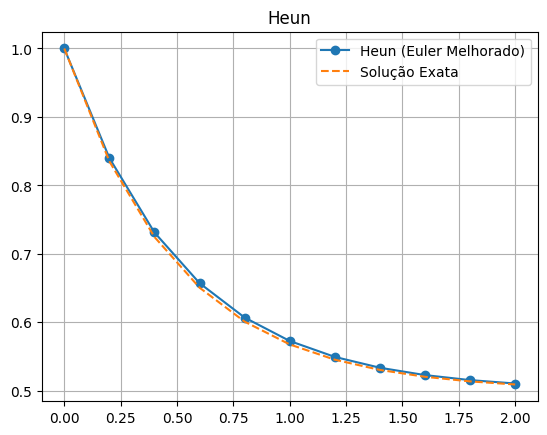

In [4]:
# Método de Heun (Euler Melhorado)
def heun(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        f0 = f(t[-1], u[-1])
        upred = u[-1] + h * f0
        f1 = f(t[-1] + h, upred)
        u_next = u[-1] + (h/2) * (f0 + f1)
        u.append(u_next)
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1
t, u = heun(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Heun (Euler Melhorado)')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.legend(); plt.grid(); plt.title('Heun'); plt.show()
